# Clustering wine data with KMeans and `sklearn`

In this notebook we will use the `wine` dataset inside `sklearn.datasets`, analyse its contents, reduce its dimensionality and illustrate how KMeans could be used to automatically "group" things that are close in latent space (or in data space).

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.datasets import load_wine

## Loading the data

In [14]:
wine_data = load_wine()

print(wine_data.keys())
print(wine_data["DESCR"])
print(wine_data["data"].shape)
print(wine_data["feature_names"])
print(wine_data["target"])
print(wine_data["target_names"])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:              

## Reducing the dimensionality using PCA

We will go through this dimensionality reduction quickly, but a more detailed explanation can be found in the previous two notebooks we covered in class.

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = wine_data["data"]

scale = StandardScaler()
X = scale.fit_transform(X)

In [16]:
pca = PCA(n_components=2)
z = pca.fit_transform(X)

In [17]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

Let's make a scatterplot with the original classes inside the orginal dataset.

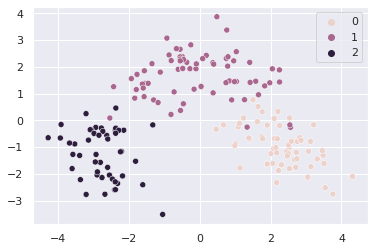

In [18]:
sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=wine_data["target"])

## Fitting KMeans

Now: **What could we do if we didn't have the classes?** One way to force labels into the data (by separating it into groups of points that are _close together_) is by fitting a clustering algorithm to it.

The clustering algorithm we covered in class was KMeans, but we will fit several of them in what follows. Fitting KMeans to data is absolutely trivial using `sklearn`.

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Question for you:** What does `n_init` mean?, what about `max_iter`? 

The information we want is stored in the attributes of `kmeans` after fitting. In particular, let's check `cluster_centers_` and `labels_`
- `cluster_centers_` contains the $k$ different means.
- `labels_` contains all the cluster identifiers (i.e. for each point, it is either 0, 1 or 2 depending on what mean they are the closest to).

In this next cell we plot both a scatter illuminated by `labels_` as well as the cluster centers.

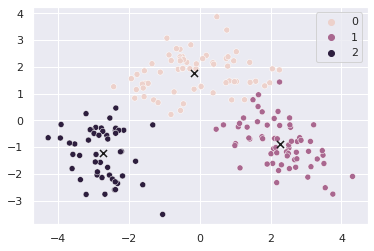

In [38]:
_, ax = plt.subplots(1, 1)

means = kmeans.cluster_centers_
ax.scatter(means[:, 0], means[:, 1], c="k", marker="x", s=50, zorder=10)
sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=kmeans.labels_, ax=ax)

The clustering seems pretty decent! For the sake of it, why not fitting a `kmeans` on the original 13-dimensional data?

In [25]:
kmeans_og = KMeans(n_clusters=3)
kmeans_og.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

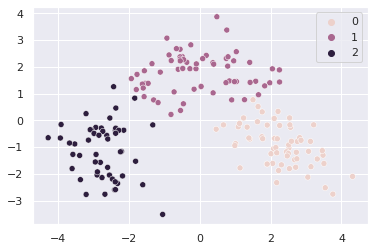

In [26]:
sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=kmeans_og.labels_)

Pretty similar, no?

## Testing other clustering algorithms

We saw in class that `KMeans` has several drawbacks: linear decision boundaries, having to manually choose the $k$ parameter...

We also saw that there exists several other clustering algorithms that alleviate this problems. [Most of them are already implemented in the `sklearn.cluster` package](https://scikit-learn.org/stable/modules/clustering.html). Let's check what's implemented in it:

In [40]:
import sklearn.cluster
dir(sklearn.cluster)

['AffinityPropagation',
 'AgglomerativeClustering',
 'Birch',
 'DBSCAN',
 'FeatureAgglomeration',
 'KMeans',
 'MeanShift',
 'MiniBatchKMeans',
 'OPTICS',
 'SpectralBiclustering',
 'SpectralClustering',
 'SpectralCoclustering',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_affinity_propagation',
 '_agglomerative',
 '_bicluster',
 '_birch',
 '_dbscan',
 '_dbscan_inner',
 '_feature_agglomeration',
 '_hierarchical_fast',
 '_k_means_elkan',
 '_k_means_fast',
 '_kmeans',
 '_mean_shift',
 '_optics',
 '_spectral',
 'affinity_propagation',
 'cluster_optics_dbscan',
 'cluster_optics_xi',
 'compute_optics_graph',
 'dbscan',
 'estimate_bandwidth',
 'get_bin_seeds',
 'k_means',
 'linkage_tree',
 'mean_shift',
 'spectral_clustering',
 'ward_tree']

Let's run the same process for more algorithms: DBSCAN automatically finds the number of clusters $k$.

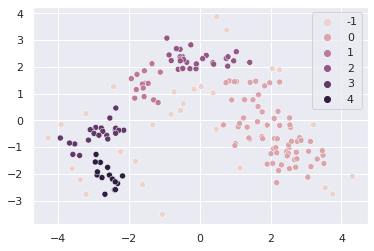

In [43]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(z)

# Some elements are not classified (-1), and DBSCAN found 5 clusters.
sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=dbscan.labels_)

Let's try Spectral Clustering too:

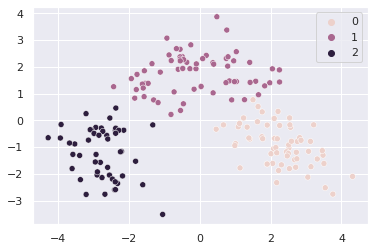

In [46]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=3)
sc.fit(z)

sns.scatterplot(x=z[:, 0], y=z[:, 1], hue=sc.labels_)